# 载入相关函数库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as sml
#设置绘图字体
plt.rcParams['font.sans-serif']=['SimHei']
#解决绘图时候坐标轴负值部分的显示问题
plt.rcParams['axes.unicode_minus']=False

In [2]:
# 导入函数库
from jqdata import *
import numpy as np
import datetime 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
import graphviz
# Technical indicator library
import talib as ta
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import copy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from jqlib.technical_analysis import *
from sklearn.ensemble import RandomForestClassifier

# 数据处理

## 数据的读取

In [3]:
#读取币种
bi_list=['BTC','ETH','PEPE','WIF','SOL','BONK','DOGE','SHIB','BOME','PYTH','JTO','JUP',
        'W','TIA','FLOKI','PENDLE','RNDR','WLD','LPT','ORDI','TAO']

In [4]:
#读取文件数据
price=pd.DataFrame() 
for name1 in bi_list:
    wj='bn_hisdata_spot_'+name1+'_USDT_1h'
    pricelinshi=pd.read_csv(wj+'.csv')
    pricelinshi['name']=name1
    price=price.append(pricelinshi)
price.count()

timestamp    218148
open         218148
high         218148
low          218148
close        218148
volume       218148
name         218148
dtype: int64

In [5]:
price.head()

,timestamp,open,high,low,close,volume,name
0,2022-01-01 00:00:00,46216.93,46731.39,46208.37,46656.13,1503.33095,BTC
1,2022-01-01 01:00:00,46656.14,46949.99,46574.06,46778.14,943.81539,BTC
2,2022-01-01 02:00:00,46778.14,46928.94,46721.96,46811.77,485.16860,BTC
3,2022-01-01 03:00:00,46811.77,46916.63,46760.12,46813.20,562.88971,BTC
4,2022-01-01 04:00:00,46813.21,46887.33,46591.23,46711.05,861.88389,BTC


In [6]:
fprice= price.pivot(index = 'timestamp',columns = 'name',values = 'close')

In [7]:
fprice.head()

name,BOME,BONK,BTC,DOGE,ETH,FLOKI,JTO,JUP,LPT,ORDI,PENDLE,PEPE,PYTH,RNDR,SHIB,SOL,TAO,TIA,W,WIF,WLD
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,NaN,NaN,46656.13,0.1719,3723.04,NaN,NaN,NaN,40.43,NaN,NaN,NaN,NaN,4.657,0.000034,172.38,NaN,NaN,NaN,NaN,NaN
2022-01-01 01:00:00,NaN,NaN,46778.14,0.1719,3724.89,NaN,NaN,NaN,40.80,NaN,NaN,NaN,NaN,4.710,0.000034,172.73,NaN,NaN,NaN,NaN,NaN
2022-01-01 02:00:00,NaN,NaN,46811.77,0.1717,3728.32,NaN,NaN,NaN,41.06,NaN,NaN,NaN,NaN,4.679,0.000034,172.75,NaN,NaN,NaN,NaN,NaN
2022-01-01 03:00:00,NaN,NaN,46813.20,0.1714,3723.96,NaN,NaN,NaN,41.36,NaN,NaN,NaN,NaN,4.691,0.000034,172.94,NaN,NaN,NaN,NaN,NaN
2022-01-01 04:00:00,NaN,NaN,46711.05,0.1702,3708.21,NaN,NaN,NaN,40.83,NaN,NaN,NaN,NaN,4.600,0.000033,171.49,NaN,NaN,NaN,NaN,NaN


In [8]:
fprice.tail()

name,BOME,BONK,BTC,DOGE,ETH,FLOKI,JTO,JUP,LPT,ORDI,PENDLE,PEPE,PYTH,RNDR,SHIB,SOL,TAO,TIA,W,WIF,WLD
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-06-10 15:00:00,0.011021,0.000028,70066.12,0.14706,3702.54,0.000277,3.256,1.0076,21.870,58.90,5.495,0.000013,0.4189,9.237,0.000023,162.38,355.4,9.23,0.630,2.8613,4.354
2024-06-10 16:00:00,0.010902,0.000028,69972.17,0.14608,3698.50,0.000275,3.242,1.0005,22.681,58.16,5.399,0.000013,0.4165,9.203,0.000023,162.00,354.5,9.16,0.626,2.8556,4.291
2024-06-10 17:00:00,0.010973,0.000028,70043.00,0.14606,3696.59,0.000275,3.239,1.0015,22.856,58.53,5.376,0.000013,0.4136,9.167,0.000023,162.61,351.1,9.18,0.629,2.8753,4.296
2024-06-10 18:00:00,0.010868,0.000028,69860.01,0.14571,3688.25,0.000272,3.215,0.9965,23.250,58.11,5.328,0.000013,0.4124,8.878,0.000023,161.91,348.3,9.13,0.613,2.8291,4.236
2024-06-10 19:00:00,0.010770,0.000028,69599.47,0.14502,3676.44,0.000267,3.196,0.9910,23.096,57.55,5.261,0.000013,0.4084,8.735,0.000023,160.66,345.9,9.05,0.586,2.7755,4.157


In [9]:
# 计算过去收益率
fprice= fprice.pct_change(1)

In [10]:
fprice.head()

name,BOME,BONK,BTC,DOGE,ETH,FLOKI,JTO,JUP,LPT,ORDI,PENDLE,PEPE,PYTH,RNDR,SHIB,SOL,TAO,TIA,W,WIF,WLD
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 01:00:00,NaN,NaN,0.002615,0.000000,0.000497,NaN,NaN,NaN,0.009152,NaN,NaN,NaN,NaN,0.011381,-0.000591,0.002030,NaN,NaN,NaN,NaN,NaN
2022-01-01 02:00:00,NaN,NaN,0.000719,-0.001163,0.000921,NaN,NaN,NaN,0.006373,NaN,NaN,NaN,NaN,-0.006582,-0.002071,0.000116,NaN,NaN,NaN,NaN,NaN
2022-01-01 03:00:00,NaN,NaN,0.000031,-0.001747,-0.001169,NaN,NaN,NaN,0.007306,NaN,NaN,NaN,NaN,0.002565,-0.002965,0.001100,NaN,NaN,NaN,NaN,NaN
2022-01-01 04:00:00,NaN,NaN,-0.002182,-0.007001,-0.004229,NaN,NaN,NaN,-0.012814,NaN,NaN,NaN,NaN,-0.019399,-0.005055,-0.008384,NaN,NaN,NaN,NaN,NaN


In [11]:
fprice2=fprice.fillna(0)
fprice2.head()

name,BOME,BONK,BTC,DOGE,ETH,FLOKI,JTO,JUP,LPT,ORDI,PENDLE,PEPE,PYTH,RNDR,SHIB,SOL,TAO,TIA,W,WIF,WLD
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2022-01-01 01:00:00,0.0,0.0,0.002615,0.000000,0.000497,0.0,0.0,0.0,0.009152,0.0,0.0,0.0,0.0,0.011381,-0.000591,0.002030,0.0,0.0,0.0,0.0,0.0
2022-01-01 02:00:00,0.0,0.0,0.000719,-0.001163,0.000921,0.0,0.0,0.0,0.006373,0.0,0.0,0.0,0.0,-0.006582,-0.002071,0.000116,0.0,0.0,0.0,0.0,0.0
2022-01-01 03:00:00,0.0,0.0,0.000031,-0.001747,-0.001169,0.0,0.0,0.0,0.007306,0.0,0.0,0.0,0.0,0.002565,-0.002965,0.001100,0.0,0.0,0.0,0.0,0.0
2022-01-01 04:00:00,0.0,0.0,-0.002182,-0.007001,-0.004229,0.0,0.0,0.0,-0.012814,0.0,0.0,0.0,0.0,-0.019399,-0.005055,-0.008384,0.0,0.0,0.0,0.0,0.0


In [12]:
fprice2=fprice2.stack()
fprice2.head()

timestamp            name
2022-01-01 00:00:00  BOME    0.0
                     BONK    0.0
                     BTC     0.0
                     DOGE    0.0
                     ETH     0.0
dtype: float64

In [13]:
fprice2.tail()

timestamp            name
2024-06-10 19:00:00  TAO    -0.006891
                     TIA    -0.008762
                     W      -0.044046
                     WIF    -0.018946
                     WLD    -0.018650
dtype: float64

In [14]:
fprice2 = fprice2.reset_index()

In [15]:
fprice2.tail()

,timestamp,name,0
449458,2024-06-10 19:00:00,TAO,-0.006891
449459,2024-06-10 19:00:00,TIA,-0.008762
449460,2024-06-10 19:00:00,W,-0.044046
449461,2024-06-10 19:00:00,WIF,-0.018946
449462,2024-06-10 19:00:00,WLD,-0.018650


In [16]:
#收益率
fprice2 = fprice2.rename(columns = {fprice2.columns[2]:'收益率'})

In [17]:
fprice2.tail()

,timestamp,name,收益率
449458,2024-06-10 19:00:00,TAO,-0.006891
449459,2024-06-10 19:00:00,TIA,-0.008762
449460,2024-06-10 19:00:00,W,-0.044046
449461,2024-06-10 19:00:00,WIF,-0.018946
449462,2024-06-10 19:00:00,WLD,-0.018650


In [18]:
#合并数据
dfl = pd.merge(price,fprice2,how='left',left_on = ['timestamp','name'],right_on = ['timestamp','name'])

In [19]:
dfl.head()

,timestamp,open,high,low,close,volume,name,收益率
0,2022-01-01 00:00:00,46216.93,46731.39,46208.37,46656.13,1503.33095,BTC,0.000000
1,2022-01-01 01:00:00,46656.14,46949.99,46574.06,46778.14,943.81539,BTC,0.002615
2,2022-01-01 02:00:00,46778.14,46928.94,46721.96,46811.77,485.16860,BTC,0.000719
3,2022-01-01 03:00:00,46811.77,46916.63,46760.12,46813.20,562.88971,BTC,0.000031
4,2022-01-01 04:00:00,46813.21,46887.33,46591.23,46711.05,861.88389,BTC,-0.002182


In [20]:
#打上训练标签
dfl= dfl.dropna(axis='index',how='all') 
df=dfl
df['target_cls'] = np.where(df['收益率'] > 0, 1, 0)
#df['target_cls'] = df['收益率']
dataset = df.copy()
dataset= dataset.dropna()
dataset.head(10)

,timestamp,open,high,low,close,volume,name,收益率,target_cls
0,2022-01-01 00:00:00,46216.93,46731.39,46208.37,46656.13,1503.33095,BTC,0.000000,0
1,2022-01-01 01:00:00,46656.14,46949.99,46574.06,46778.14,943.81539,BTC,0.002615,1
2,2022-01-01 02:00:00,46778.14,46928.94,46721.96,46811.77,485.16860,BTC,0.000719,1
3,2022-01-01 03:00:00,46811.77,46916.63,46760.12,46813.20,562.88971,BTC,0.000031,1
4,2022-01-01 04:00:00,46813.21,46887.33,46591.23,46711.05,861.88389,BTC,-0.002182,0
5,2022-01-01 05:00:00,46711.05,47555.55,46673.94,47192.55,1400.73642,BTC,0.010308,1
6,2022-01-01 06:00:00,47192.56,47324.42,46940.00,46979.62,613.97776,BTC,-0.004512,0
7,2022-01-01 07:00:00,46979.61,47255.85,46864.84,47194.73,646.20081,BTC,0.004579,1
8,2022-01-01 08:00:00,47194.73,47344.69,47075.11,47124.82,532.44767,BTC,-0.001481,0
9,2022-01-01 09:00:00,47124.82,47215.56,46933.58,47143.98,541.32491,BTC,0.000407,1


In [21]:
dataset2=dataset['target_cls']
dataset2=dataset2.shift(-1)
dataset3=dataset
dataset3['target_cls']=dataset2
print(dataset3.count())
dataset3.head(10)

timestamp     218148
open          218148
high          218148
low           218148
close         218148
volume        218148
name          218148
收益率           218148
target_cls    218147
dtype: int64


,timestamp,open,high,low,close,volume,name,收益率,target_cls
0,2022-01-01 00:00:00,46216.93,46731.39,46208.37,46656.13,1503.33095,BTC,0.000000,1.0
1,2022-01-01 01:00:00,46656.14,46949.99,46574.06,46778.14,943.81539,BTC,0.002615,1.0
2,2022-01-01 02:00:00,46778.14,46928.94,46721.96,46811.77,485.16860,BTC,0.000719,1.0
3,2022-01-01 03:00:00,46811.77,46916.63,46760.12,46813.20,562.88971,BTC,0.000031,0.0
4,2022-01-01 04:00:00,46813.21,46887.33,46591.23,46711.05,861.88389,BTC,-0.002182,1.0
5,2022-01-01 05:00:00,46711.05,47555.55,46673.94,47192.55,1400.73642,BTC,0.010308,0.0
6,2022-01-01 06:00:00,47192.56,47324.42,46940.00,46979.62,613.97776,BTC,-0.004512,1.0
7,2022-01-01 07:00:00,46979.61,47255.85,46864.84,47194.73,646.20081,BTC,0.004579,0.0
8,2022-01-01 08:00:00,47194.73,47344.69,47075.11,47124.82,532.44767,BTC,-0.001481,1.0
9,2022-01-01 09:00:00,47124.82,47215.56,46933.58,47143.98,541.32491,BTC,0.000407,0.0


In [22]:
new_df=dataset3

# 计算加工特征

In [24]:
import talib

In [25]:
# 计算MACD指标
macd, macdsignal, macdhist = talib.MACD(new_df['close'], fastperiod=12, slowperiod=26, signalperiod=9)
 
# 将计算结果合并到原始DataFrame中
#new_df['macd'] = macd
#new_df['macdsignal'] = macdsignal
new_df['macdhist'] = macdhist
#new_df = new_df.drop('收益率', axis=1)
new_df.tail(10)

,timestamp,open,high,low,close,volume,name,收益率,target_cls,macdhist
218138,2024-06-10 10:00:00,351.4,353.7,349.6,350.6,1581.1285,TAO,-0.001993,0.0,-0.909518
218139,2024-06-10 11:00:00,350.6,351.2,347.4,348.0,2451.0625,TAO,-0.007416,0.0,-0.827909
218140,2024-06-10 12:00:00,348.0,349.0,345.6,346.5,1735.6103,TAO,-0.004310,0.0,-0.793466
218141,2024-06-10 13:00:00,346.5,347.3,341.3,344.9,3384.2520,TAO,-0.004618,1.0,-0.794964
218142,2024-06-10 14:00:00,345.0,350.2,342.3,349.6,3391.2919,TAO,0.013627,1.0,-0.415049
218143,2024-06-10 15:00:00,349.5,360.0,349.2,355.4,5431.7802,TAO,0.016590,0.0,0.255160
218144,2024-06-10 16:00:00,355.6,357.0,350.9,354.5,2716.6698,TAO,-0.002532,0.0,0.644024
218145,2024-06-10 17:00:00,354.6,354.8,350.0,351.1,2210.4488,TAO,-0.009591,0.0,0.675151
218146,2024-06-10 18:00:00,351.1,352.2,347.0,348.3,1552.7562,TAO,-0.007975,0.0,0.517175
218147,2024-06-10 19:00:00,348.2,348.6,344.3,345.9,1005.2681,TAO,-0.006891,NaN,0.273303


In [26]:
d_l=pd.DataFrame() 

In [27]:
#计算均线10，30，60根均线差值
d_l['10_j'] = new_df['close'].rolling(window=10).mean()
d_l['30_j'] = new_df['close'].rolling(window=30).mean()
d_l['60_j'] = new_df['close'].rolling(window=60).mean()
new_df['1030_jun']=d_l['10_j']-d_l['30_j']
new_df['1060_jun']=d_l['10_j']-d_l['60_j']
new_df['3060_jun']=d_l['30_j']-d_l['60_j']

new_df.tail(5)

,timestamp,open,high,low,close,volume,name,收益率,target_cls,macdhist,1030_jun,1060_jun,3060_jun
218143,2024-06-10 15:00:00,349.5,360.0,349.2,355.4,5431.7802,TAO,0.016590,0.0,0.255160,-8.696667,-15.811667,-7.115000
218144,2024-06-10 16:00:00,355.6,357.0,350.9,354.5,2716.6698,TAO,-0.002532,0.0,0.644024,-8.206667,-14.848333,-6.641667
218145,2024-06-10 17:00:00,354.6,354.8,350.0,351.1,2210.4488,TAO,-0.009591,0.0,0.675151,-6.796667,-13.013333,-6.216667
218146,2024-06-10 18:00:00,351.1,352.2,347.0,348.3,1552.7562,TAO,-0.007975,0.0,0.517175,-6.456667,-12.283333,-5.826667
218147,2024-06-10 19:00:00,348.2,348.6,344.3,345.9,1005.2681,TAO,-0.006891,NaN,0.273303,-6.676667,-12.125000,-5.448333


In [28]:
#计算kdj指标
d_l['RSV'] = (new_df['high'] - new_df['low'].shift(1)) / (new_df['high'] - new_df['low'].rolling(9).min()) * 100
# 计算K值
d_l['K'] = d_l['RSV'].rolling(3).mean()
# 计算D值
d_l['D'] = d_l['K'].rolling(3).mean()
# 计算J值
new_df['J'] = 3 * d_l['K'] - 2 * d_l['D']

In [29]:
#计算rsi指标
diff = new_df['close'].diff(1)
up = diff.where(diff > 0, 0.0)
down = -diff.where(diff < 0, 0.0)
up_avg = up.rolling(window=14).mean()
down_avg = down.rolling(window=14).mean()
rs = up_avg / down_avg
rsi = 100.0 - (100.0 / (1.0 + rs))
rsi = rsi.fillna(50.0)
rsi.tail()
new_df['rsi']=rsi

In [30]:
#计算布林轨道指标
window = 20  # 移动平均的窗口大小
ma = new_df['close'].rolling(window=60).mean()
std = new_df['close'].rolling(window=60).std()
 
# 计算布林轨道上下限
multiplier = 2 
upper_band = ma + (multiplier * std)
lower_band = ma - (multiplier * std)
#upper_band.head()
#df.loc[df['A'] > 2, 'B'] = -1
new_df['juli_upper']=((upper_band)-new_df['close'])/upper_band
new_df.loc[new_df['juli_upper'] > 0, 'juli_upper'] = 1
new_df.loc[new_df['juli_upper'] < 0, 'juli_upper'] = -1
new_df['juli_lower']=(new_df['close']-(lower_band))/lower_band
new_df.loc[new_df['juli_lower'] > 0, 'juli_lower'] = 1
new_df.loc[new_df['juli_lower'] < 0, 'juli_lower'] = -1


In [31]:
#计算obv指标
new_df['obv'] = new_df['volume'] * (new_df['close'] / new_df['close'].shift(1)).apply(lambda x: 1 if x > 0 else -1)
new_df.loc[new_df['close'].isnull(), 'obv'] = None  # 将第一个条目的OBV设置为None，或者根据需要设置其他默认值
new_df['obv'] = new_df['obv'].cumsum()

In [32]:
#计算最高价10，30，60根均线差值
d_l['10_day_max'] = new_df['high'].rolling(window=10).max()
d_l['30_day_max'] = new_df['high'].rolling(window=30).max()
d_l['60_day_max'] = new_df['high'].rolling(window=60).max()
new_df['1030_max']=d_l['10_day_max']-d_l['30_day_max']
new_df['1060_max']=d_l['10_day_max']-d_l['60_day_max']
new_df['3060_max']=d_l['30_day_max']-d_l['60_day_max']

In [33]:
#计算最低价10，30，60根均线差值
d_l['10_day_min'] = new_df['low'].rolling(window=10).min()
d_l['30_day_min'] = new_df['low'].rolling(window=30).min()
d_l['60_day_min'] = new_df['low'].rolling(window=60).min()
new_df['1030_min']=d_l['10_day_min']-d_l['30_day_min']
new_df['1060_min']=d_l['10_day_min']-d_l['60_day_min']
new_df['3060_min']=d_l['30_day_min']-d_l['60_day_min']

In [34]:
#计算成交量10，30，60根均线差值
d_l['10_day_volume'] = new_df['volume'].rolling(window=10).min()
d_l['30_day_volume'] = new_df['volume'].rolling(window=30).min()
d_l['60_day_volume'] = new_df['volume'].rolling(window=60).min()
new_df['1030_volume']=d_l['10_day_volume']-d_l['30_day_volume']
new_df['1060_volume']=d_l['10_day_volume']-d_l['60_day_volume']
new_df['3060_volume']=d_l['30_day_volume']-d_l['60_day_volume']

In [35]:
#计算开盘价10，30，60根均线差值
d_l['10_jo'] = new_df['open'].rolling(window=10).mean()
d_l['30_jo'] = new_df['open'].rolling(window=30).mean()
d_l['60_jo'] = new_df['open'].rolling(window=60).mean()
new_df['1030_juno']=d_l['10_jo']-d_l['30_jo']
new_df['1060_juno']=d_l['10_jo']-d_l['60_jo']
new_df['3060_juno']=d_l['30_jo']-d_l['60_jo']



In [36]:
#计算开盘价与前根收盘价差值
new_df['o_c_1']=new_df['open']-new_df['close'].shift(1)
new_df['o_c_10']=new_df['open']-new_df['close'].shift(10)
new_df['o_c_30']=new_df['open']-new_df['close'].shift(30)

In [37]:
#计算收盘价与前1，30根差值
new_df['c_c_1']=((new_df['close'].shift(1)+new_df['close'].shift(2)+new_df['close'].shift(3))/3
                 -(new_df['close'].shift(10)+new_df['close'].shift(11)+new_df['close'].shift(12))/3)


In [38]:
new_df.tail(5)

,timestamp,open,high,low,close,volume,name,收益率,target_cls,macdhist,1030_jun,1060_jun,3060_jun,J,rsi,juli_upper,juli_lower,obv,1030_max,1060_max,3060_max,1030_min,1060_min,3060_min,1030_volume,1060_volume,3060_volume,1030_juno,1060_juno,3060_juno,o_c_1,o_c_10,o_c_30,c_c_1
218143,2024-06-10 15:00:00,349.5,360.0,349.2,355.4,5431.7802,TAO,0.016590,0.0,0.255160,-8.696667,-15.811667,-7.115000,94.384762,45.060659,1.0,1.0,2.186273e+16,-8.2,-34.5,-26.3,0.0,0.0,0.0,994.4450,1036.5294,42.0844,-8.810000,-16.301667,-7.491667,-0.1,-6.6,-13.1,-12.066667
218144,2024-06-10 16:00:00,355.6,357.0,350.9,354.5,2716.6698,TAO,-0.002532,0.0,0.644024,-8.206667,-14.848333,-6.641667,87.900929,42.198582,1.0,1.0,2.186273e+16,-8.2,-34.5,-26.3,0.0,0.0,0.0,994.4450,1036.5294,42.0844,-8.643333,-15.748333,-7.105000,0.2,4.8,-2.5,-4.566667
218145,2024-06-10 17:00:00,354.6,354.8,350.0,351.1,2210.4488,TAO,-0.009591,0.0,0.675151,-6.796667,-13.013333,-6.216667,38.037956,38.671210,1.0,1.0,2.186273e+16,-8.2,-34.5,-26.3,1.6,1.6,0.0,994.4450,1036.5294,42.0844,-8.156667,-14.786667,-6.630000,0.1,15.5,-2.8,4.500000
218146,2024-06-10 18:00:00,351.1,352.2,347.0,348.3,1552.7562,TAO,-0.007975,0.0,0.517175,-6.456667,-12.283333,-5.826667,-3.307982,42.193309,1.0,1.0,2.186273e+16,-8.2,-34.5,-26.3,4.3,4.3,0.0,966.0727,1008.1571,42.0844,-6.763333,-12.961667,-6.198333,0.0,3.4,-5.6,7.800000
218147,2024-06-10 19:00:00,348.2,348.6,344.3,345.9,1005.2681,TAO,-0.006891,NaN,0.273303,-6.676667,-12.125000,-5.448333,1.947830,40.827338,1.0,1.0,2.186273e+16,-8.2,-34.5,-26.3,4.3,4.3,0.0,418.5846,460.6690,42.0844,-6.433333,-12.240000,-5.806667,-0.1,-3.1,-7.3,5.266667


# 因子测试

In [40]:
del price
del d_l

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
# 设置中文字体
plt.rcParams['font.family'] = 'SimHei'

In [42]:

# 创建 DataFrame
df = new_df
df=df.drop(['name','timestamp'], axis = 1)
df = df.astype(float)
correlation_matrix = df.corr()

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


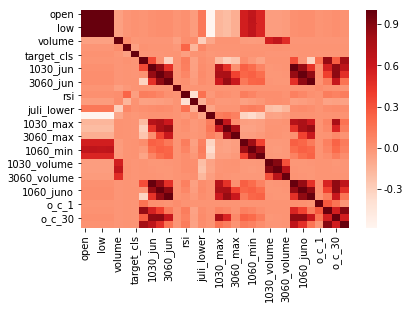

<Figure size 144000x108000 with 0 Axes>

In [43]:
#热力图分析
sns.heatmap(correlation_matrix, annot=False,  cmap='Reds')
#fig, ax = plt.subplots()
plt.figure(figsize=(2000,1500))
# 调整整体大小
#fig.set_size_inches(8, 6)
sns.set(font_scale=1)  # 设置字体比例
#plt.title('Correlation Heatmap')
plt.show()

In [44]:
#计算特征关联度
correlation_matrix

,open,high,low,close,volume,收益率,target_cls,macdhist,1030_jun,1060_jun,3060_jun,J,rsi,juli_upper,juli_lower,obv,1030_max,1060_max,3060_max,1030_min,1060_min,3060_min,1030_volume,1060_volume,3060_volume,1030_juno,1060_juno,3060_juno,o_c_1,o_c_10,o_c_30,c_c_1
open,1.000000,0.999989,0.999985,0.999982,-0.054082,-0.002229,0.016768,-0.000535,0.021487,0.030360,0.030166,0.000614,0.022419,-0.034905,0.136567,-0.582184,-0.158029,-0.192670,-0.123195,0.572520,0.660006,0.525555,-0.038401,-0.043154,-0.030892,0.021583,0.030403,0.030168,0.000010,0.013185,0.024207,0.014470
high,0.999989,1.000000,0.999977,0.999989,-0.054083,-0.001782,0.016709,-0.000257,0.021446,0.030280,0.030072,0.000614,0.022696,-0.035331,0.136594,-0.582182,-0.158126,-0.192776,-0.123255,0.572768,0.660195,0.525628,-0.038402,-0.043155,-0.030892,0.021491,0.030291,0.030068,0.000003,0.013174,0.024093,0.014451
low,0.999985,0.999977,1.000000,0.999989,-0.054082,-0.001736,0.016703,-0.000103,0.021649,0.030482,0.030216,0.000614,0.022806,-0.035028,0.136826,-0.582203,-0.157866,-0.192523,-0.123136,0.572419,0.659920,0.525509,-0.038401,-0.043155,-0.030892,0.021683,0.030481,0.030203,0.000007,0.013338,0.024325,0.014592
close,0.999982,0.999989,0.999989,1.000000,-0.054081,-0.001391,0.016636,-0.000034,0.021569,0.030410,0.030172,0.000614,0.022926,-0.035340,0.136780,-0.582174,-0.157991,-0.192636,-0.123181,0.572623,0.660085,0.525585,-0.038400,-0.043153,-0.030891,0.021579,0.030395,0.030158,0.000001,0.013195,0.024175,0.014486
volume,-0.054082,-0.054083,-0.054082,-0.054081,1.000000,0.038383,-0.012250,-0.001240,-0.003007,-0.003493,-0.002972,-0.053162,0.030117,0.040140,-0.285658,-0.085789,0.006822,0.008946,0.006151,-0.029706,-0.034133,-0.027117,0.568092,0.654143,0.490781,-0.003009,-0.003493,-0.002972,-0.003296,-0.003050,-0.003874,-0.002067
收益率,-0.002229,-0.001782,-0.001736,-0.001391,0.038383,1.000000,-0.053479,0.011315,0.002339,0.001413,0.000141,-0.014047,0.230250,-0.160291,0.062802,0.003567,0.001905,0.001273,0.000102,0.001852,0.000892,-0.000279,0.010339,0.012495,0.010218,0.000412,0.000085,-0.000249,0.000022,0.000149,-0.000395,0.000682
target_cls,0.016768,0.016709,0.016703,0.016636,-0.012250,-0.053479,1.000000,-0.005163,-0.001959,-0.001498,-0.000645,-0.000711,-0.048569,0.010555,0.012465,-0.008323,-0.003814,-0.005926,-0.004671,0.006342,0.009110,0.008717,-0.005908,-0.006854,-0.005223,-0.001407,-0.001067,-0.000446,-0.002319,-0.003134,-0.002223,-0.002029
macdhist,-0.000535,-0.000257,-0.000103,-0.000034,-0.001240,0.011315,-0.005163,1.000000,0.346215,0.007373,-0.315562,0.008497,0.114416,-0.058793,0.028234,0.000107,-0.181094,-0.295370,-0.239273,0.039184,-0.021128,-0.069951,0.002491,0.003707,0.003997,0.326994,-0.005750,-0.319209,0.169845,0.847540,0.263146,0.798925
1030_jun,0.021487,0.021446,0.021649,0.021569,-0.003007,0.002339,-0.001959,0.346215,1.000000,0.847413,0.465573,0.000015,0.106021,-0.056352,0.040516,0.011971,0.710229,0.459663,0.019056,0.247373,0.194152,0.081829,-0.008550,-0.006178,0.000625,0.998614,0.842606,0.458906,0.028007,0.552642,0.866986,0.676608
1060_jun,0.030360,0.030280,0.030482,0.030410,-0.003493,0.001413,-0.001498,0.007373,0.847413,1.000000,0.864415,-0.000009,0.072738,-0.047699,0.044762,0.016979,0.764995,0.767940,0.379541,0.224401,0.248415,0.189748,-0.009004,-0.009130,-0.005076,0.850655,0.999451,0.860442,0.019506,0.389284,0.870636,0.480312


In [45]:
#关联度排序分析
correlation_matrix2=correlation_matrix
correlation_matrix2 = correlation_matrix2.sort_values(by=['收益率'])
correlation_matrix2['收益率']

juli_upper    -0.160291
target_cls    -0.053479
J             -0.014047
open          -0.002229
high          -0.001782
low           -0.001736
close         -0.001391
o_c_30        -0.000395
3060_min      -0.000279
3060_juno     -0.000249
o_c_1          0.000022
1060_juno      0.000085
3060_max       0.000102
3060_jun       0.000141
o_c_10         0.000149
1030_juno      0.000412
c_c_1          0.000682
1060_min       0.000892
1060_max       0.001273
1060_jun       0.001413
1030_min       0.001852
1030_max       0.001905
1030_jun       0.002339
obv            0.003567
3060_volume    0.010218
1030_volume    0.010339
macdhist       0.011315
1060_volume    0.012495
volume         0.038383
juli_lower     0.062802
rsi            0.230250
收益率            1.000000
Name: 收益率, dtype: float64

In [46]:
#随机森林模型特点，去除单纯数值大小与相对比较逻辑的特征
#open          -0.002229
#high          -0.001782
#low           -0.001736
#close         -0.001391
#volume         0.038383
#剔除与收益率目标值关联度相对较小的特征
#o_c_1          0.000022
#1060_juno      0.000085
#3060_max       0.000102
#3060_jun       0.000141
#o_c_10         0.000149
#1030_juno      0.000412
#c_c_1          0.000682
#1060_min       0.000892

# 训练

In [48]:
new_df2=new_df.fillna(0)

In [49]:
from sklearn.preprocessing import StandardScaler



ss = StandardScaler()

#scale_features = ['open','high','low','close','volume','macdhist','1030_jun','1060_jun','3060_jun']

#选出过滤后的特征
scale_features = ['macdhist','J','rsi','1030_jun','1060_jun'
                 ,'1030_max','1060_max','1030_min','1060_min','3060_min'
                 ,'1030_volume','1060_volume','3060_volume','obv','juli_upper','juli_lower'
                 ]
# 使用z-score标准化数据
new_df2[scale_features] = ss.fit_transform(new_df2[scale_features])
new_df2.tail(10)

,timestamp,open,high,low,close,volume,name,收益率,target_cls,macdhist,1030_jun,1060_jun,3060_jun,J,rsi,juli_upper,juli_lower,obv,1030_max,1060_max,3060_max,1030_min,1060_min,3060_min,1030_volume,1060_volume,3060_volume,1030_juno,1060_juno,3060_juno,o_c_1,o_c_10,o_c_30,c_c_1
218138,2024-06-10 10:00:00,351.4,353.7,349.6,350.6,1581.1285,TAO,-0.001993,0.0,-0.017128,-0.010127,-0.014708,-8.420000,0.001909,-0.848946,0.239029,0.589175,0.798541,0.062107,0.051439,-31.1,-0.176536,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,-4.743333,-13.463333,-8.720000,0.1,-9.8,-9.2,-15.500000
218139,2024-06-10 11:00:00,350.6,351.2,347.4,348.0,2451.0625,TAO,-0.007416,0.0,-0.015586,-0.012469,-0.015689,-8.216667,0.001909,-1.072794,0.239029,0.589175,0.798541,0.062107,0.051439,-31.1,-0.176536,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,-5.440000,-13.855000,-8.415000,0.0,-10.5,-13.5,-11.566667
218140,2024-06-10 12:00:00,348.0,349.0,345.6,346.5,1735.6103,TAO,-0.004310,0.0,-0.014935,-0.015448,-0.017143,-8.078333,0.001909,-0.969000,0.239029,0.589175,0.798541,0.062107,0.051439,-31.1,-0.176536,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,-6.206667,-14.416667,-8.210000,0.0,-15.3,-19.4,-11.900000
218141,2024-06-10 13:00:00,346.5,347.3,341.3,344.9,3384.2520,TAO,-0.004618,1.0,-0.014963,-0.019516,-0.018996,-7.811667,0.001909,-1.091627,0.239029,0.589175,0.798541,0.057607,0.048994,-30.7,-0.176536,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,-7.180000,-15.250000,-8.070000,0.0,-17.9,-16.6,-14.566667
218142,2024-06-10 14:00:00,345.0,350.2,342.3,349.6,3391.2919,TAO,0.013627,1.0,-0.007784,-0.020344,-0.018915,-7.491667,0.001909,-0.676938,0.239029,0.589175,0.798541,0.049958,0.047584,-27.1,-0.176536,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,-8.526667,-16.328333,-7.801667,0.1,-11.7,-17.7,-15.000000
218143,2024-06-10 15:00:00,349.5,360.0,349.2,355.4,5431.7802,TAO,0.016590,0.0,0.004880,-0.019829,-0.017975,-7.115000,0.001909,-0.287745,0.239029,0.589175,0.798541,0.050858,0.048900,-26.3,-0.176536,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,-8.810000,-16.301667,-7.491667,-0.1,-6.6,-13.1,-12.066667
218144,2024-06-10 16:00:00,355.6,357.0,350.9,354.5,2716.6698,TAO,-0.002532,0.0,0.012228,-0.018345,-0.016317,-6.641667,0.001909,-0.466987,0.239029,0.589175,0.798541,0.050858,0.048900,-26.3,-0.176536,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,-8.643333,-15.748333,-7.105000,0.2,4.8,-2.5,-4.566667
218145,2024-06-10 17:00:00,354.6,354.8,350.0,351.1,2210.4488,TAO,-0.009591,0.0,0.012816,-0.014074,-0.013159,-6.216667,0.001909,-0.687894,0.239029,0.589175,0.798541,0.050858,0.048900,-26.3,-0.169322,-0.198647,-0.161131,-0.119537,-0.134416,-0.096221,-8.156667,-14.786667,-6.630000,0.1,15.5,-2.8,4.500000
218146,2024-06-10 18:00:00,351.1,352.2,347.0,348.3,1552.7562,TAO,-0.007975,0.0,0.009831,-0.013045,-0.011903,-5.826667,0.001909,-0.467317,0.239029,0.589175,0.798541,0.050858,0.048900,-26.3,-0.157150,-0.191613,-0.161131,-0.119537,-0.134416,-0.096221,-6.763333,-12.961667,-6.198333,0.0,3.4,-5.6,7.800000
218147,2024-06-10 19:00:00,348.2,348.6,344.3,345.9,1005.2681,TAO,-0.006891,0.0,0.005223,-0.013711,-0.011631,-5.448333,0.001909,-0.552863,0.239029,0.589175,0.798541,0.050858,0.048900,-26.3,-0.157150,-0.191613,-0.161131,-0.119537,-0.134416,-0.096221,-6.433333,-12.240000,-5.806667,-0.1,-3.1,-7.3,5.266667


In [50]:
dataset=new_df2
X = dataset[scale_features]
y = dataset.target_cls

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
#开始划分数据
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1, random_state=432, stratify=y)

In [52]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10)
#开始训练
forest.fit(X_train, y_train)
y_cls_pred = forest.predict(X_test)
from sklearn.metrics import classification_report
#开始分类
report = classification_report(y_test, y_cls_pred)
print(report)

             precision    recall  f1-score   support

        0.0       0.52      0.60      0.56     11305
        1.0       0.48      0.40      0.43     10510

avg / total       0.50      0.50      0.50     21815



In [53]:
#处理结果统计收益率
predvsact2 = X_test.copy()
predvsact2['predict'] = y_cls_pred
df = pd.merge(dataset,predvsact2,on=scale_features,how='inner')
df.head(3)

,timestamp,open,high,low,close,volume,name,收益率,target_cls,macdhist,1030_jun,1060_jun,3060_jun,J,rsi,juli_upper,juli_lower,obv,1030_max,1060_max,3060_max,1030_min,1060_min,3060_min,1030_volume,1060_volume,3060_volume,1030_juno,1060_juno,3060_juno,o_c_1,o_c_10,o_c_30,c_c_1,predict
0,2022-01-01 03:00:00,46811.77,46916.63,46760.12,46813.20,562.88971,BTC,0.000031,0.0,0.000058,0.006512,0.009233,0.0,0.001909,0.021589,-1.975051,-0.554357,-1.818776,0.063157,0.081337,0.0,-0.176536,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,0.0,0.0,0.0,0.00,0.00,0.0,0.000000,1.0
1,2022-01-01 07:00:00,46979.61,47255.85,46864.84,47194.73,646.20081,BTC,0.004579,0.0,0.000058,0.006512,0.009233,0.0,0.001909,0.021589,-1.975051,-0.554357,-1.818776,0.063157,0.081337,0.0,-0.176536,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,0.0,0.0,0.0,-0.01,0.00,0.0,0.000000,1.0
2,2022-01-01 13:00:00,47074.05,47199.67,46935.09,47023.24,454.14412,BTC,-0.001079,0.0,0.000058,0.006512,0.009233,0.0,0.001909,0.593804,-1.975051,-0.554357,-1.818776,0.063157,0.081337,0.0,-0.176536,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,0.0,0.0,0.0,0.00,260.85,0.0,100.296667,1.0


In [54]:
df.head(10)

,timestamp,open,high,low,close,volume,name,收益率,target_cls,macdhist,1030_jun,1060_jun,3060_jun,J,rsi,juli_upper,juli_lower,obv,1030_max,1060_max,3060_max,1030_min,1060_min,3060_min,1030_volume,1060_volume,3060_volume,1030_juno,1060_juno,3060_juno,o_c_1,o_c_10,o_c_30,c_c_1,predict
0,2022-01-01 03:00:00,46811.77,46916.63,46760.12,46813.20,562.88971,BTC,0.000031,0.0,0.000058,0.006512,0.009233,0.000000,0.001909,0.021589,-1.975051,-0.554357,-1.818776,0.063157,0.081337,0.00,-0.176536,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,1.0
1,2022-01-01 07:00:00,46979.61,47255.85,46864.84,47194.73,646.20081,BTC,0.004579,0.0,0.000058,0.006512,0.009233,0.000000,0.001909,0.021589,-1.975051,-0.554357,-1.818776,0.063157,0.081337,0.00,-0.176536,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,0.000000,0.000000,0.000000,-0.01,0.00,0.00,0.000000,1.0
2,2022-01-01 13:00:00,47074.05,47199.67,46935.09,47023.24,454.14412,BTC,-0.001079,0.0,0.000058,0.006512,0.009233,0.000000,0.001909,0.593804,-1.975051,-0.554357,-1.818776,0.063157,0.081337,0.00,-0.176536,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,0.000000,0.000000,0.000000,0.00,260.85,0.00,100.296667,1.0
3,2022-01-01 20:00:00,47329.79,47559.03,47250.18,47391.82,717.20792,BTC,0.001311,0.0,0.000058,0.006512,0.009233,0.000000,0.001909,0.544724,-1.975051,-0.554357,-1.818776,0.063157,0.081337,0.00,-0.176536,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,0.000000,0.000000,0.000000,0.01,458.71,0.00,501.643333,1.0
4,2022-01-02 05:00:00,46910.30,47089.63,46832.08,47081.28,686.20377,BTC,0.003645,1.0,0.000058,0.606984,0.009233,0.000000,0.001909,-0.152307,-1.975051,-0.554357,-1.818776,-0.147781,0.081337,0.00,2.356489,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,252.117333,0.000000,0.000000,0.00,-419.48,0.00,-344.846667,0.0
5,2022-01-02 06:00:00,47081.28,47244.00,47011.24,47122.61,528.20197,BTC,0.000878,1.0,0.000058,0.478347,0.009233,0.000000,0.001909,-0.163336,-1.975051,-0.554357,-1.818776,-0.147781,0.081337,0.00,0.707855,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,198.454667,0.000000,0.000000,0.00,-310.54,425.15,-320.366667,0.0
6,2022-01-02 11:00:00,47188.88,47400.00,47159.57,47235.50,359.02993,BTC,0.000988,1.0,-1.053994,-0.123927,0.009233,0.000000,0.001909,-0.132612,-1.975051,-0.554357,-1.818776,-0.619591,0.081337,0.00,0.070699,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,-27.182000,0.000000,0.000000,-0.01,-189.09,-3.67,-347.130000,1.0
7,2022-01-04 13:00:00,46641.52,47069.01,46410.00,46955.22,1511.87787,BTC,0.006726,1.0,1.850240,-0.156530,-0.594583,-297.077167,0.001909,0.717432,0.239029,0.589175,-1.818776,-0.688304,-0.784580,-420.00,1.177122,0.579414,-0.161131,-0.119537,-0.134416,-0.096221,-121.485667,-422.377167,-300.891500,-0.01,327.55,-409.85,509.450000,0.0
8,2022-01-04 19:00:00,45750.01,46454.86,45580.99,46052.36,2717.79608,BTC,0.006609,1.0,-0.816326,0.604345,-0.255804,-351.403500,0.001909,-0.063846,0.239029,0.589175,-1.818776,0.063157,-0.325263,-432.46,-0.176536,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,191.317333,-141.979833,-333.297167,0.01,-606.20,-1403.49,-107.886667,0.0
9,2022-01-05 05:00:00,46419.00,46419.00,46246.01,46302.80,494.64292,BTC,-0.002406,1.0,0.293171,-0.445202,-0.644286,-230.654833,0.001909,-0.596562,0.239029,0.589175,-1.818776,-1.449605,-0.878610,-12.46,0.825250,0.376081,-0.161131,-0.119537,-0.134416,-0.096221,-178.659333,-422.776500,-244.117167,4.53,366.64,-27.10,258.866667,0.0


In [55]:
#开空方向计算收益率
df.loc[df['predict'] == 0, '收益率'] = -df['收益率']
df.head(10)

,timestamp,open,high,low,close,volume,name,收益率,target_cls,macdhist,1030_jun,1060_jun,3060_jun,J,rsi,juli_upper,juli_lower,obv,1030_max,1060_max,3060_max,1030_min,1060_min,3060_min,1030_volume,1060_volume,3060_volume,1030_juno,1060_juno,3060_juno,o_c_1,o_c_10,o_c_30,c_c_1,predict
0,2022-01-01 03:00:00,46811.77,46916.63,46760.12,46813.20,562.88971,BTC,0.000031,0.0,0.000058,0.006512,0.009233,0.000000,0.001909,0.021589,-1.975051,-0.554357,-1.818776,0.063157,0.081337,0.00,-0.176536,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,1.0
1,2022-01-01 07:00:00,46979.61,47255.85,46864.84,47194.73,646.20081,BTC,0.004579,0.0,0.000058,0.006512,0.009233,0.000000,0.001909,0.021589,-1.975051,-0.554357,-1.818776,0.063157,0.081337,0.00,-0.176536,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,0.000000,0.000000,0.000000,-0.01,0.00,0.00,0.000000,1.0
2,2022-01-01 13:00:00,47074.05,47199.67,46935.09,47023.24,454.14412,BTC,-0.001079,0.0,0.000058,0.006512,0.009233,0.000000,0.001909,0.593804,-1.975051,-0.554357,-1.818776,0.063157,0.081337,0.00,-0.176536,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,0.000000,0.000000,0.000000,0.00,260.85,0.00,100.296667,1.0
3,2022-01-01 20:00:00,47329.79,47559.03,47250.18,47391.82,717.20792,BTC,0.001311,0.0,0.000058,0.006512,0.009233,0.000000,0.001909,0.544724,-1.975051,-0.554357,-1.818776,0.063157,0.081337,0.00,-0.176536,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,0.000000,0.000000,0.000000,0.01,458.71,0.00,501.643333,1.0
4,2022-01-02 05:00:00,46910.30,47089.63,46832.08,47081.28,686.20377,BTC,-0.003645,1.0,0.000058,0.606984,0.009233,0.000000,0.001909,-0.152307,-1.975051,-0.554357,-1.818776,-0.147781,0.081337,0.00,2.356489,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,252.117333,0.000000,0.000000,0.00,-419.48,0.00,-344.846667,0.0
5,2022-01-02 06:00:00,47081.28,47244.00,47011.24,47122.61,528.20197,BTC,-0.000878,1.0,0.000058,0.478347,0.009233,0.000000,0.001909,-0.163336,-1.975051,-0.554357,-1.818776,-0.147781,0.081337,0.00,0.707855,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,198.454667,0.000000,0.000000,0.00,-310.54,425.15,-320.366667,0.0
6,2022-01-02 11:00:00,47188.88,47400.00,47159.57,47235.50,359.02993,BTC,0.000988,1.0,-1.053994,-0.123927,0.009233,0.000000,0.001909,-0.132612,-1.975051,-0.554357,-1.818776,-0.619591,0.081337,0.00,0.070699,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,-27.182000,0.000000,0.000000,-0.01,-189.09,-3.67,-347.130000,1.0
7,2022-01-04 13:00:00,46641.52,47069.01,46410.00,46955.22,1511.87787,BTC,-0.006726,1.0,1.850240,-0.156530,-0.594583,-297.077167,0.001909,0.717432,0.239029,0.589175,-1.818776,-0.688304,-0.784580,-420.00,1.177122,0.579414,-0.161131,-0.119537,-0.134416,-0.096221,-121.485667,-422.377167,-300.891500,-0.01,327.55,-409.85,509.450000,0.0
8,2022-01-04 19:00:00,45750.01,46454.86,45580.99,46052.36,2717.79608,BTC,-0.006609,1.0,-0.816326,0.604345,-0.255804,-351.403500,0.001909,-0.063846,0.239029,0.589175,-1.818776,0.063157,-0.325263,-432.46,-0.176536,-0.202815,-0.161131,-0.119537,-0.134416,-0.096221,191.317333,-141.979833,-333.297167,0.01,-606.20,-1403.49,-107.886667,0.0
9,2022-01-05 05:00:00,46419.00,46419.00,46246.01,46302.80,494.64292,BTC,0.002406,1.0,0.293171,-0.445202,-0.644286,-230.654833,0.001909,-0.596562,0.239029,0.589175,-1.818776,-1.449605,-0.878610,-12.46,0.825250,0.376081,-0.161131,-0.119537,-0.134416,-0.096221,-178.659333,-422.776500,-244.117167,4.53,366.64,-27.10,258.866667,0.0


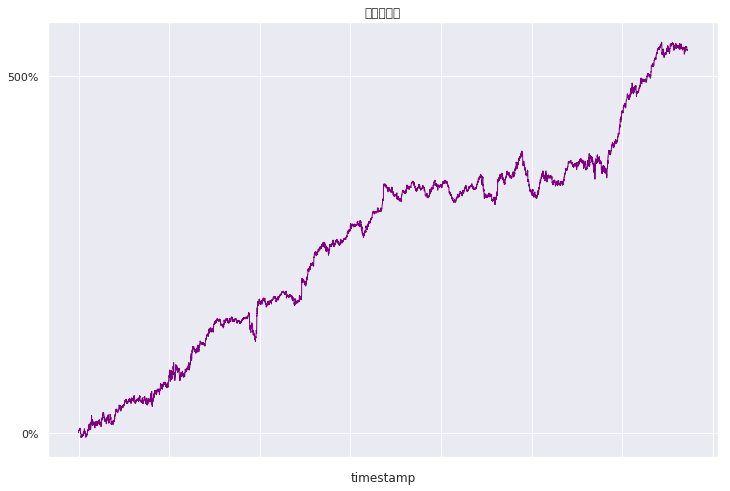

In [56]:
#构造收益率曲线
dt = df[(df.predict == 1) |( df.predict == 0)]
dt.groupby('timestamp')['收益率'].mean()
(dt.groupby('timestamp')['收益率'].mean()).cumsum().plot(figsize=(12,8),color='purple',linewidth=1,grid=True)
plt.title('收益率曲线')

def to_percent(temp, position):
  return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
y_major_locator=MultipleLocator(5)
ax=plt.gca()
ax.yaxis.set_major_locator(y_major_locator)

In [71]:
#年化策略收益率
annual_return=(dt.groupby('timestamp')['收益率'].mean()).cumsum().tail(1)/1.5

In [72]:
# 计算最大回撤比率
def maxdrawdown_vec(arr):
    # arr是每期收益率的时间序列
    # 先计算累积收益率
    arr = (1+arr).cumprod()
    j = np.argmax((np.maximum.accumulate(arr) - arr)/np.maximum.accumulate(arr)) # end of the period
    i = np.argmax(arr[:j]) # start of period
    return (1-arr[j]/arr[i])

In [73]:
#策略最大回撤率
drawdown=maxdrawdown_vec((dt.groupby('timestamp')['收益率'].mean()))

In [74]:
# 计算年化夏普率
def annualised_sharpe_ratio(arr, periods = 12):
    """
    Create the annualised Sharpe Sharpe ratio for the strategy, based on a 
    benchmark of zero (i.e. no risk-free rate information).

    Parameters:
    returns - A pandas Series representing period percentage returns.
    periods - Monthly(12), Daily (252), Hourly (252*6.5), Minutely(252*6.5*60) etc.
    """
    sharperatio = np.sqrt(periods)*arr.mean()/arr.std()
    return sharperatio

In [75]:
#策略年化夏普率
sharpe=annualised_sharpe_ratio((dt.groupby('timestamp')['收益率'].mean()).cumsum(),(12))/1.5

In [76]:
# 计算年化波动率
def annualised_std(arr, periods = 12):
    """
    Create the annualised volatility for the strategy, based on a 
    benchmark of zero (i.e. no risk-free rate information).

    Parameters:
    returns - A pandas Series representing period percentage returns.
    periods - Monthly(12), Daily (252), Hourly (252*6.5), Minutely(252*6.5*60) etc.
    """
    std = np.sqrt(periods)*arr.std()
    return std

In [78]:
#策略年化波动率
Volatility=annualised_std((dt.groupby('timestamp')['收益率'].mean()).cumsum(),(18))

# 统计结果

In [79]:
#return/drawdown
annual_return/drawdown

timestamp
2024-06-10 18:00:00    7.148105
Name: 收益率, dtype: float64

In [80]:
#sharpe
sharpe

4.2413197093020765